In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import graphviz
from ipywidgets import *
%matplotlib inline

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data[:,2:], columns = [iris.feature_names[2], iris.feature_names[3]])
pd.set_option('display.max_columns', None)

In [49]:
df['diagnosis'] = iris.target
df

,petal length (cm),petal width (cm),diagnosis
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


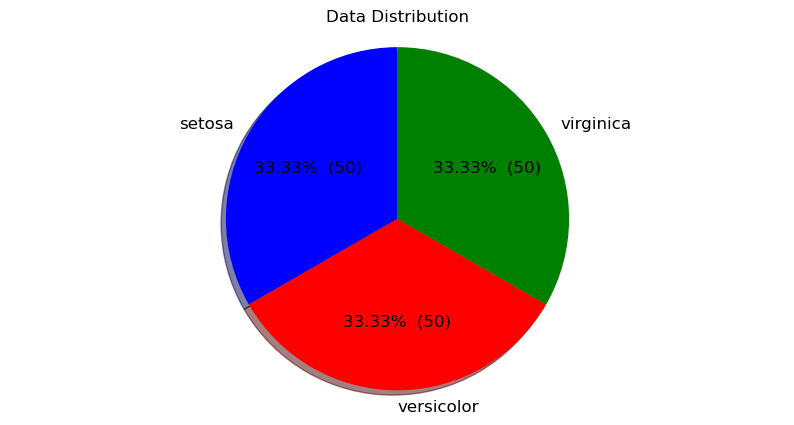

In [54]:
diagnosis = df['diagnosis'].value_counts()
diagnosis_label = iris.target_names
diagnosis_size = diagnosis.values
colors = ['red', 'blue']
sizes = [diagnosis_size[0],diagnosis_size[1],diagnosis_size[2]]
plt.figure(6,figsize=(10,5), dpi=100)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(sizes,colors=['blue','red','green'],textprops={'fontsize': 12},autopct=make_autopct(sizes), 
        labels=diagnosis_label,
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Data Distribution')
plt.show()

In [7]:
df_0 = df[df['diagnosis'] == 0]
df_1 = df[df['diagnosis'] == 1]
df_2 = df[df['diagnosis'] == 2]

In [67]:
def plothist(area, bins):
    plt.figure(1,figsize=(7,5), dpi=100)
    plt.title('Distrubution')
    plt.hist(df_0[area], alpha=0.5, color='blue', bins=bins, label='setosa')
    plt.hist(df_1[area], alpha=0.5, color='red', bins=bins, label='versicolor')
    plt.hist(df_2[area], alpha=0.5, color='green', bins=bins, label='virginica')
    plt.xlabel('Values')
    plt.ylabel('Y',rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)
    plt.show()
    return

In [68]:
interact(plothist,area=list(df.columns),bins=(4,40,4))

interactive(children=(Dropdown(description='area', options=('petal length (cm)', 'petal width (cm)', 'diagnosi…

<function __main__.plothist(area, bins)>

In [55]:
X = pd.DataFrame(df.drop(["diagnosis"],1)).to_numpy()
y = df['diagnosis']
y = y.to_numpy()
type(X), X.shape, type(y), y.shape

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_5628/2677327236.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = pd.DataFrame(df.drop(["diagnosis"],1)).to_numpy()


(numpy.ndarray, (150, 2), numpy.ndarray, (150,))

max_depth=3, puis max_depth=4 jusqu'à max_depth=10

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) 

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 2), (105,), (45, 2), (45,))

In [69]:
def modeling(max_depth):
    #criterion entre les entropy et gini, on peut changer pour voir, mais je ne sais pas
    model = tree.DecisionTreeClassifier(random_state=42, max_depth=max_depth, criterion='entropy')
    model = model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    
    dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=[iris.feature_names[2],iris.feature_names[3]],  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
    graph = graphviz.Source(dot_data)  
    print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))
    return graph

In [66]:
interact(modeling,max_depth=(3,10,1))

interactive(children=(IntSlider(value=6, description='max_depth', max=10, min=3), Output()), _dom_classes=('wi…

<function __main__.modeling(max_depth)>